# Predicting House Sale Prices

### Objective:
The goal is to build a predictive model to estimate house sale prices based on various features of the houses in the dataset. This involves performing exploratory data analysis (EDA), preprocessing the data, selecting relevant features, building and tuning machine learning models, and evaluating the models' performance.

### Guide:
- **Data Understanding**: Understand the meaning of each feature.
- **Exploratory Data Analysis (EDA)**: Gain insights into the data distribution and relationships between features.
- **Data Preprocessing**: Handle missing values, categorical variables, and scale features.
- **Feature Engineering**: Create new features or transform existing ones to improve model performance.
- **Model Selection**: Choose suitable models for prediction.
- **Hyperparameter Tuning**: Optimize model parameters.
- **Ensemble Methods**: Combine multiple models to improve accuracy.
- **Model Evaluation**: Use appropriate metrics to evaluate model performance.
- **Hypothesis Testing**: Validate the model's ability to predict sale prices.

### Feature Documentation
Let's document what each feature represents:

| **#** | **Feature**       | **Description**                                                                 |
|-------|-------------------|---------------------------------------------------------------------------------|
| 1     | **Id**            | Unique identifier for each house.                                               |
| 2     | **MSSubClass**    | Identifies the type of dwelling involved in the sale.                           |
| 3     | **MSZoning**      | General zoning classification of the sale.                                      |
| 4     | **LotFrontage**   | Linear feet of street connected to the property.                                |
| 5     | **LotArea**       | Lot size in square feet.                                                        |
| 6     | **Street**        | Type of road access to the property.                                            |
| 7     | **Alley**         | Type of alley access to the property.                                           |
| 8     | **LotShape**      | General shape of the property.                                                  |
| 9     | **LandContour**   | Flatness of the property.                                                       |
| 10    | **Utilities**     | Type of utilities available.                                                    |
| 11    | **LotConfig**     | Lot configuration.                                                              |
| 12    | **LandSlope**     | Slope of the property.                                                          |
| 13    | **Neighborhood**  | Physical locations within Ames city limits.                                     |
| 14    | **Condition1**    | Proximity to various conditions.                                                |
| 15    | **Condition2**    | Proximity to various conditions (if more than one is present).                  |
| 16    | **BldgType**      | Type of dwelling.                                                               |
| 17    | **HouseStyle**    | Style of dwelling.                                                              |
| 18    | **OverallQual**   | Overall material and finish quality.                                            |
| 19    | **OverallCond**   | Overall condition rating.                                                       |
| 20    | **YearBuilt**     | Original construction date.                                                     |


| **#** | **Feature**       | **Description**                                                                 |
|-------|-------------------|---------------------------------------------------------------------------------|
| 21    | **YearRemodAdd**  | Remodel date.                                                                   |
| 22    | **RoofStyle**     | Type of roof.                                                                   |
| 23    | **RoofMatl**      | Roof material.                                                                  |
| 24    | **Exterior1st**   | Exterior covering on house.                                                     |
| 25    | **Exterior2nd**   | Exterior covering on house (if more than one material).                         |
| 26    | **MasVnrType**    | Masonry veneer type.                                                            |
| 27    | **MasVnrArea**    | Masonry veneer area in square feet.                                             |
| 28    | **ExterQual**     | Exterior material quality.                                                      |
| 29    | **ExterCond**     | Present condition of the material on the exterior.                              |
| 30    | **Foundation**    | Type of foundation.                                                             |
| 31    | **BsmtQual**      | Height of the basement.                                                         |
| 32    | **BsmtCond**      | General condition of the basement.                                              |
| 33    | **BsmtExposure**  | Walkout or garden level basement walls.                                         |
| 34    | **BsmtFinType1**  | Quality of basement finished area.                                              |
| 35    | **BsmtFinSF1**    | Type 1 finished square feet.                                                    |
| 36    | **BsmtFinType2**  | Quality of second finished area (if present).                                   |
| 37    | **BsmtFinSF2**    | Type 2 finished square feet.                                                    |
| 38    | **BsmtUnfSF**     | Unfinished square feet of basement area.                                        |
| 39    | **TotalBsmtSF**   | Total square feet of basement area.                                             |
| 40    | **Heating**       | Type of heating.                                                                |

| **#** | **Feature**       | **Description**                                                                 |
|-------|-------------------|---------------------------------------------------------------------------------|
| 41    | **HeatingQC**     | Heating quality and condition.                                                  |
| 42    | **CentralAir**    | Central air conditioning.                                                       |
| 43    | **Electrical**    | Electrical system.                                                              |
| 44    | **1stFlrSF**      | First floor square feet.                                                        |
| 45    | **2ndFlrSF**      | Second floor square feet.                                                       |
| 46    | **LowQualFinSF**  | Low-quality finished square feet.                                               |
| 47    | **GrLivArea**     | Above grade (ground) living area square feet.                                   |
| 48    | **BsmtFullBath**  | Basement full bathrooms.                                                        |
| 49    | **BsmtHalfBath**  | Basement half bathrooms.                                                        |
| 50    | **FullBath**      | Full bathrooms above grade.                                                     |
| 51    | **HalfBath**      | Half baths above grade.                                                         |
| 52    | **BedroomAbvGr**  | Number of bedrooms above basement level.                                        |
| 53    | **KitchenAbvGr**  | Number of kitchens.                                                             |
| 54    | **KitchenQual**   | Kitchen quality.                                                                |
| 55    | **TotRmsAbvGrd**  | Total rooms above grade (does not include bathrooms).                           |
| 56    | **Functional**    | Home functionality (Assume typical unless deductions are warranted).            |
| 57    | **Fireplaces**    | Number of fireplaces.                                                           |
| 58    | **FireplaceQu**   | Fireplace quality.                                                              |
| 59    | **GarageType**    | Garage location.                                                                |
| 60    | **GarageYrBlt**   | Year garage was built.                                                          |

| **#** | **Feature**       | **Description**                                                                 |
|-------|-------------------|---------------------------------------------------------------------------------|
| 61    | **GarageFinish**  | Interior finish of the garage.                                                  |
| 62    | **GarageCars**    | Size of garage in car capacity.                                                 |
| 63    | **GarageArea**    | Size of garage in square feet.                                                  |
| 64    | **GarageQual**    | Garage quality.                                                                 |
| 65    | **GarageCond**    | Garage condition.                                                               |
| 66    | **PavedDrive**    | Paved driveway.                                                                 |
| 67    | **WoodDeckSF**    | Wood deck area in square feet.                                                  |
| 68    | **OpenPorchSF**   | Open porch area in square feet.                                                 |
| 69    | **EnclosedPorch** | Enclosed porch area in square feet.                                             |
| 70    | **3SsnPorch**     | Three-season porch area in square feet.                                         |
| 71    | **ScreenPorch**   | Screen porch area in square feet.                                               |
| 72    | **PoolArea**      | Pool area in square feet.                                                       |
| 73    | **PoolQC**        | Pool quality.                                                                   |
| 74    | **Fence**         | Fence quality.                                                                  |
| 75    | **MiscFeature**   | Miscellaneous feature not covered in other categories.                         |
| 76    | **MiscVal**       | Value of miscellaneous feature.                                                 |
| 77    | **MoSold**        | Month sold.                                                                     |
| 78    | **YrSold**        | Year sold.                                                                      |
| 79    | **SaleType**      | Type of sale.                                                                   |
| 80    | **SaleCondition** | Condition of sale.                                                              |
| 81    | **SalePrice**     | Sale price (this is the target variable).                                       |

## Step 1: Import Required Libraries

In [50]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data preprocessing and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Library Usage:

1. **`pandas (pd)`**: Used for data manipulation and analysis, primarily for handling tabular data structures (DataFrames).

2. **`numpy (np)`**: Provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

3. **`matplotlib.pyplot (plt)`**: A core plotting library used for creating static, animated, and interactive visualizations in Python.

4. **`seaborn (sns)`**: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

5. **`plotly.express (px)`**: A quick and easy way to create interactive plots, especially suitable for exploratory data analysis.

6. **`plotly.graph_objects (go)`**: Offers more customizable and complex plotting capabilities for building interactive visualizations.

7. **`sklearn.model_selection`**:
   - **`train_test_split`**: Splits the dataset into training and testing subsets.
   - **`cross_val_score`**: Evaluates a model’s performance using cross-validation.

8. **`sklearn.preprocessing`**:
   - **`StandardScaler`**: Standardizes features by removing the mean and scaling to unit variance.
   - **`LabelEncoder`**: Encodes categorical labels into numeric values.

9. **`sklearn.impute.SimpleImputer`**: Handles missing data by imputing values using a specified strategy (e.g., mean, median).

10. **`sklearn.linear_model.LinearRegression`**: A machine learning model for linear regression, useful for predicting continuous values.

11. **`sklearn.ensemble.RandomForestRegressor`**: An ensemble learning method that combines multiple decision trees for regression tasks.

12. **`sklearn.metrics`**:
    - **`mean_squared_error`**: Measures the average squared difference between actual and predicted values.
    - **`mean_absolute_error`**: Measures the average absolute difference between actual and predicted values.
    - **`r2_score`**: Evaluates the proportion of variance captured by the model, indicating its performance.

## Step 2: Load and Explore the Data

In [51]:
# Load the datasets
houses = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')

In [52]:
# To get the first 5 elemnts of the training dataset
houses.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
# To get the first 5 elemnts of the testing dataset
houses_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
# To get the columns of the training dataset
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
# To get the shape of the training dataset
houses.shape

(1460, 81)

In [56]:
# To get the columns of the testing dataset
houses_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
# To get the shape of the testing dataset
houses_test.shape

(1459, 80)

In [58]:
# To get the info of the training dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
# To get the info of the testing dataset
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [60]:
# To get the descriptive statistic of the training dataset
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [61]:
# To get the descriptive statistic of the testing dataset
houses_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [62]:
# Sum of null values in each column of the training dataset
null_values_train = houses.isnull().sum()
print(null_values_train[null_values_train > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [63]:
# Sum of null values in each column of the training dataset
null_values_test = houses_test.isnull().sum()
null_values_test[null_values_test > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [64]:
# Handle Missing Values

# Identify categorical and numerical columns (excluding 'SalePrice' from numerical columns)
cat_cols = houses.select_dtypes(include=['object']).columns.tolist()
num_cols = houses.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice']).columns.tolist()

# Replace missing values in categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
houses[cat_cols] = cat_imputer.fit_transform(houses[cat_cols])
houses_test[cat_cols] = cat_imputer.transform(houses_test[cat_cols])

# Replace missing values in numerical columns with median
num_imputer = SimpleImputer(strategy='median')
houses[num_cols] = num_imputer.fit_transform(houses[num_cols])
houses_test[num_cols] = num_imputer.transform(houses_test[num_cols])

In [65]:
# Encode categorical features
label_encoder = {}
for col in cat_cols:
    le = LabelEncoder()
    houses[col] = le.fit_transform(houses[col])
    houses_test[col] = le.transform(houses_test[col])
    label_encoder[col] = le

In [66]:
# Verify if all missing values have been handled
print("Missing values in training set after handling:")
print(houses.isnull().sum().sum())  # Should output 0

print("\nMissing values in test set after handling:")
print(houses_test.isnull().sum().sum())  # Should output 0

Missing values in training set after handling:
0

Missing values in test set after handling:
0


## Step 3: Epxloratory Data Analysis

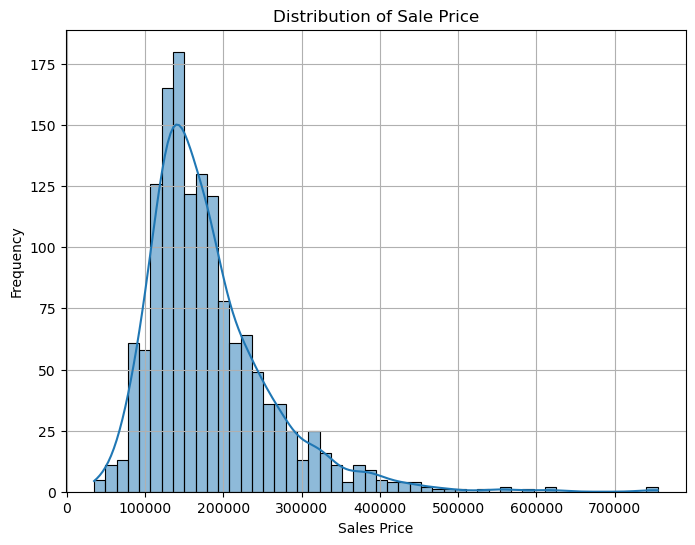

In [67]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(houses['SalePrice'], bins=50, edgecolor='black',kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

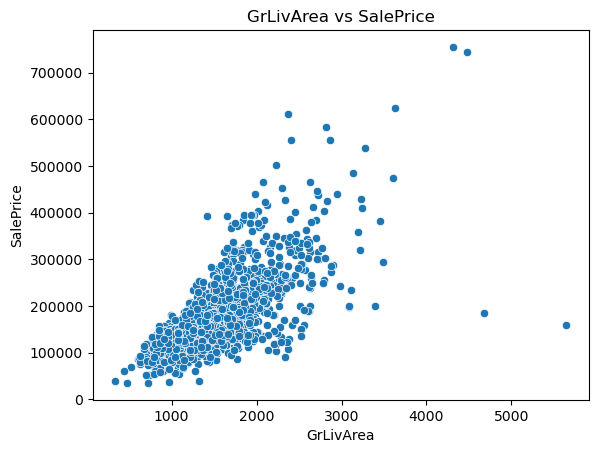

In [68]:
# Scatter plot of key features
sns.scatterplot(x=houses['GrLivArea'], y=houses['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.show()

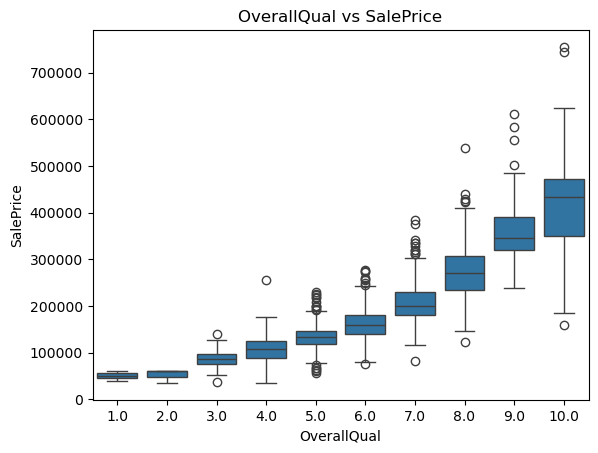

In [69]:
sns.boxplot(x='OverallQual', y='SalePrice', data=houses)
plt.title('OverallQual vs SalePrice')
plt.show()

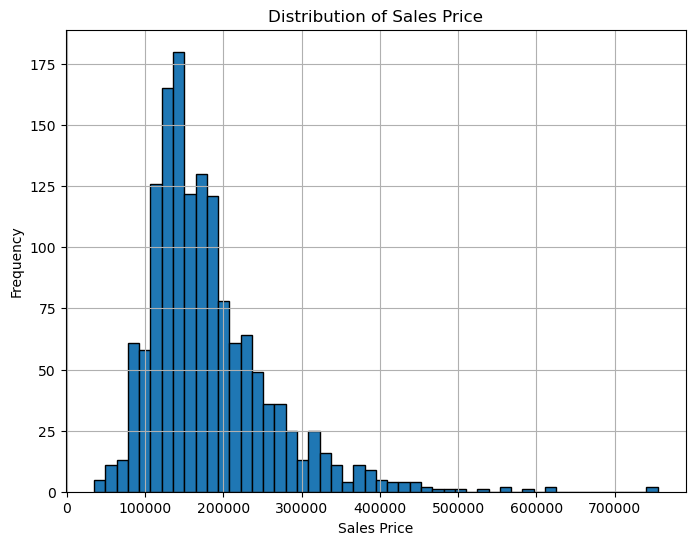

In [70]:
# Ploting Sales Price
plt.figure(figsize=(8, 6))
plt.hist(houses['SalePrice'], bins=50, edgecolor='black')
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
# Plot interactive histogram
fig = px.histogram(houses, x='SalePrice', nbins=50, title='Distribution of Sales Price')
fig.show()

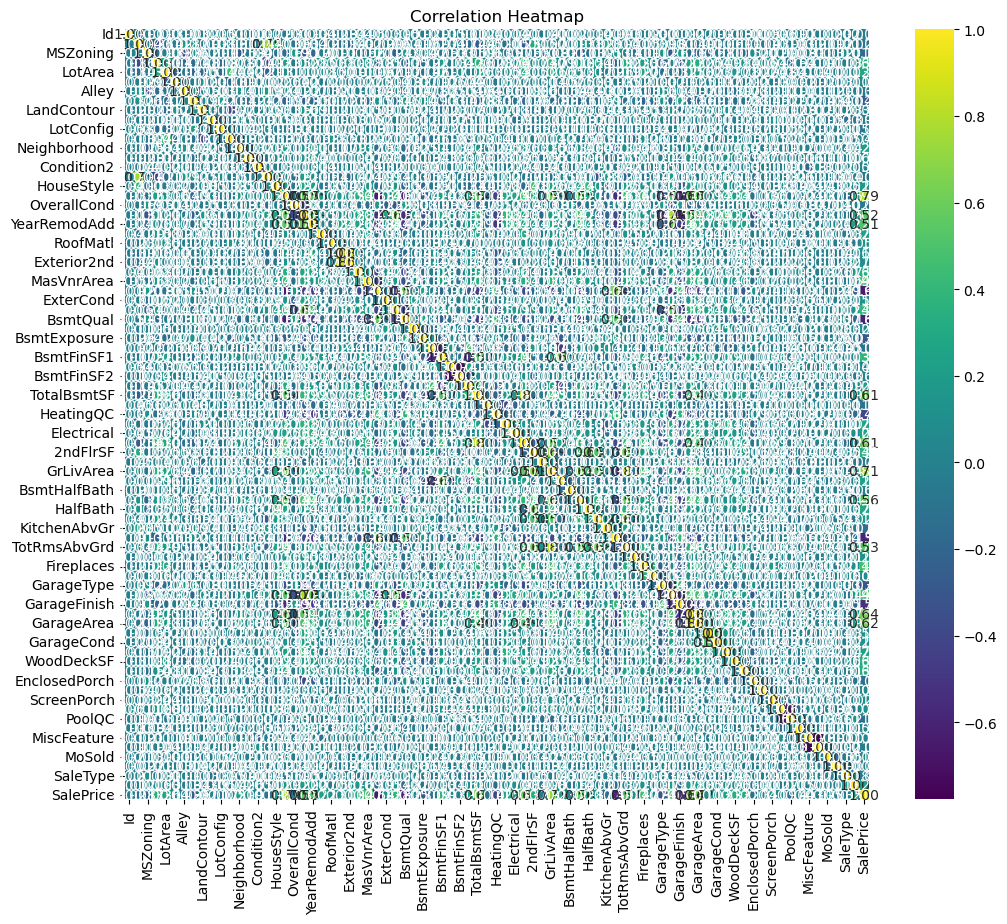

In [72]:
# Compute correlation matrix

# Filter only numeric columns
numeric_columns = houses.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = houses[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [73]:
# Sort top 5 features based on SalePrice
top_5_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_5_correlation.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


### Interpretation:
- The subsequent rows show the top features that correlate strongly with `SalePrice`:
  - `OverallQual` (Overall Quality) has a correlation coefficient of approximately 0.79, indicating a strong positive correlation. As `OverallQual` increases, `SalePrice` tends to increase as well.
  - Other features like `GrLivArea` (Above Ground Living Area), `GarageCars` (Size of Garage in Car Capacity), `GarageArea` (Size of Garage in Square Feet), `TotalBsmtSF` (Total Square Feet of Basement Area), and so on, also show strong positive correlations with `SalePrice`.

These correlations provide insight into which features are most influential in determining the `SalePrice` of houses in your dataset. This information can guide further analysis or modeling efforts, such as selecting important features for predicting `SalePrice`. If you have any more questions or need further clarification, feel free to ask!

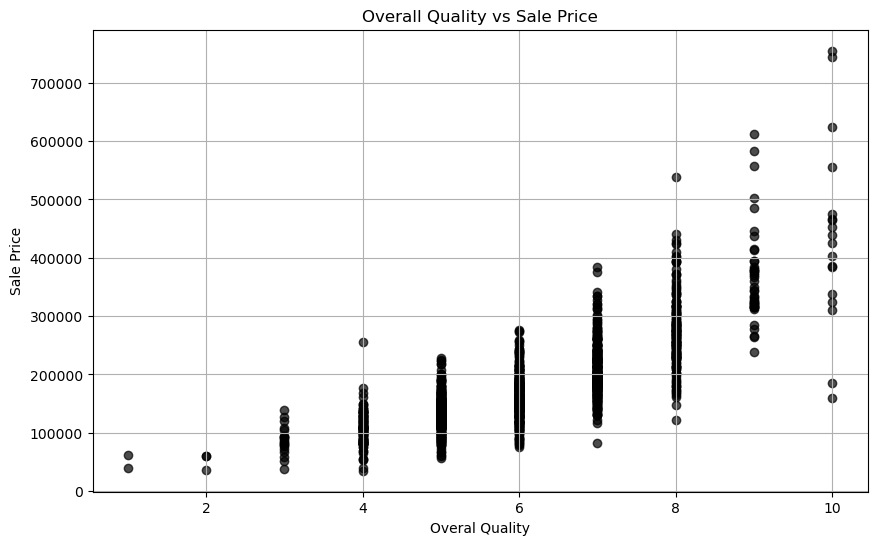

In [74]:
# Scatter plot of OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['OverallQual'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overal Quality')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

The visual representation shows that an increase in the overall quality is directly related to increase in the sale price

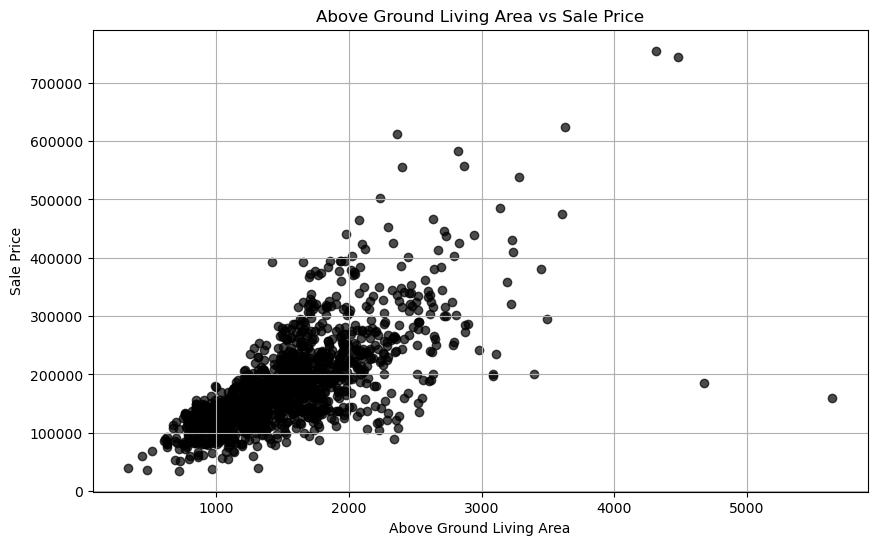

In [75]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GrLivArea'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

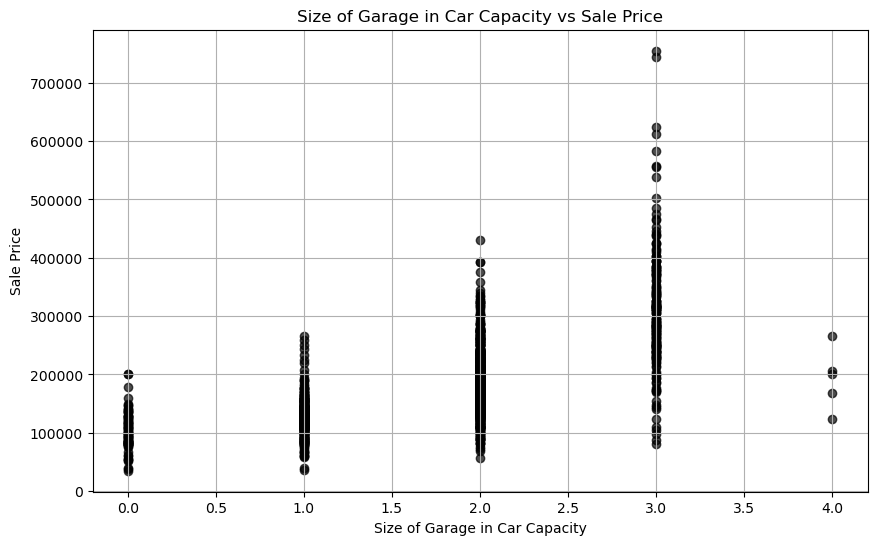

In [76]:
# Scatter plot of GarageCars vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GarageCars'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Size of Garage in Car Capacity vs Sale Price')
plt.xlabel('Size of Garage in Car Capacity')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

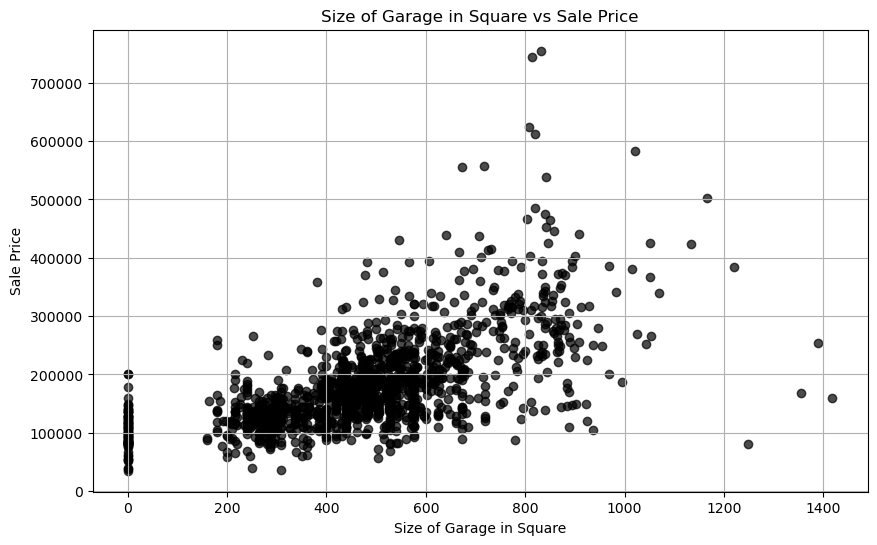

In [77]:
# Scatter plot of GarageArea vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(houses['GarageArea'], houses['SalePrice'], alpha=0.7, color='black')
plt.title('Size of Garage in Square vs Sale Price')
plt.xlabel('Size of Garage in Square')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [78]:
fig = px.scatter_matrix(houses, 
                        dimensions=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'],
                        title='Pair Plot of Selected Features')
fig.update_layout(width=1000, height=1000)
fig.show()

### Step 5: Data Preprocessing

In [93]:
# Separate features and target variable
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = houses[features]
y = houses['SalePrice']


# Handling categorical features using OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Scaling numerical features using MinMaxScaler
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Handling categorical features using OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Model Selection and Training

#### Random Forest Regressor

In [94]:
# Pipeline including preprocessing and model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]
}

rf_grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", rf_grid_search.best_params_)

# Predicting and evaluating on validation set
rf_preds = rf_grid_search.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
rf_r2 = r2_score(y_val, rf_preds)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R2 Score: {rf_r2}')


Best parameters found:  {'model__max_depth': 10, 'model__n_estimators': 300}
Random Forest RMSE: 29779.486732065092
Random Forest R2 Score: 0.8843832966068264


#### Gradient Descent Regressor

In [95]:
# Gradient Boosting Regressor Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.05],
    'model__max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", gb_grid_search.best_params_)

# Predicting and evaluating on validation set
gb_preds = gb_grid_search.predict(X_val)
gb_rmse = np.sqrt(mean_squared_error(y_val, gb_preds))
gb_r2 = r2_score(y_val, gb_preds)

print(f'Gradient Boosting RMSE: {gb_rmse}')
print(f'Gradient Boosting R2 Score: {gb_r2}')


Best parameters found:  {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Gradient Boosting RMSE: 29606.417800583513
Gradient Boosting R2 Score: 0.8857232467947208


#### Stacking Regressor (Ensemble)

In [100]:
# Clean the best_params_ dictionary by removing any prefixes like 'model__'
def clean_params(params):
    return {key.split('__')[-1]: value for key, value in params.items()}

# Cleaned parameters for each model
rf_cleaned_params = clean_params(rf_grid_search.best_params_)
gb_cleaned_params = clean_params(gb_grid_search.best_params_)

# Stacking multiple models
estimators = [
    ('rf', RandomForestRegressor(**rf_cleaned_params)),
    ('gb', GradientBoostingRegressor(**gb_cleaned_params))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

# Fitting and predicting
stacking_regressor.fit(X_train, y_train)
stacking_preds = stacking_regressor.predict(X_val)
stacking_rmse = np.sqrt(mean_squared_error(y_val, stacking_preds))
stacking_r2 = r2_score(y_val, stacking_preds)

print(f'Stacking Regressor RMSE: {stacking_rmse}')
print(f'Stacking Regressor R2 Score: {stacking_r2}')


Stacking Regressor RMSE: 40520.796067356525
Stacking Regressor R2 Score: 0.7859367555458336


### Step 7: Hypothesis Testing
**Null Hypothesis (H0)**: The model does not predict sale prices better than a random guess.

**Alternative Hypothesis (H1)**: The model predicts sale prices significantly better than a random guess.

In [101]:
from scipy.stats import ttest_ind

# T-test to compare the model predictions against actual values
t_stat, p_value = ttest_ind(y_val, stacking_preds)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# If p-value < 0.05, reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: The model's predictions are significantly better than random guessing.")
else:
    print("Fail to reject the null hypothesis: The model's predictions are not significantly better than random guessing.")


T-statistic: 0.16721516826795876
P-value: 0.8672588320085488
Fail to reject the null hypothesis: The model's predictions are not significantly better than random guessing.


### Step 8: Final Model and Predictions on Test Data

In [ ]:
# Making final predictions on test data
final_preds = stacking_regressor.predict(houses_test.drop(columns=['Id']))

# Prepare for submission
submission = pd.DataFrame({'Id': houses_test['Id'], 'SalePrice': final_preds})
submission.to_csv('submission.csv', index=False)


In [80]:
# Define the features and target 
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = houses[features]
y = houses['SalePrice']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Starndardize Features
scaler = StandardScaler()

# Training and validating features
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_val = pd.DataFrame(scaler.transform(X_val), columns=features)

In [82]:
# Train The Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))

print("Linear Regression RMSE:", lr_rmse)

# Additional evaluation metrics
mse = mean_squared_error(y_val, lr_predictions)
mae = mean_absolute_error(y_val, lr_predictions)
r2 = r2_score(y_val, lr_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Linear Regression RMSE: 39568.64464628706
Mean Squared Error (MSE): 1565677639.1441417
Root Mean Squared Error (RMSE): 39568.64464628706
Mean Absolute Error (MAE): 24935.83323394043
R-squared (R2): 0.79587861104563


In [83]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))

print(f'Random Forest RMSE: {rf_rmse}')

# Additional evaluation metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_val, rf_predictions)
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_r2 = r2_score(y_val, rf_predictions)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest R-squared (R2): {rf_r2}")

Random Forest RMSE: 29534.804876670853
Random Forest Mean Squared Error (MSE): 872304699.1030204
Random Forest Mean Absolute Error (MAE): 19025.962361790607
Random Forest R-squared (R2): 0.8862754105183078


## Step 7: Prediction of SalePrice

In [84]:
# Predicting SalePrice for test data
X_test = houses_test[features]

# Standardize the test data
X_test = pd.DataFrame(scaler.transform(X_test), columns=features)

# Predictions using Linear Regression
lr_test_predictions = lr.predict(X_test)

# Predictions using Random Forest
rf_test_predictions = rf.predict(X_test)


In [85]:
# Create DataFrame for submission using Linear Regression
lr_submission = pd.DataFrame({
    'Id': houses_test['Id'],
    'SalePrice': lr_test_predictions
})

lr_submission.head()


,Id,SalePrice
0,1461.0,114362.784924
1,1462.0,162428.919052
2,1463.0,167069.138599
3,1464.0,187256.968178
4,1465.0,221316.596747


In [86]:
# Save the submission file
lr_submission.to_csv('lr_submission.csv', index=False)

In [87]:
# Create DataFrame for submission using Random Forest
rf_submission = pd.DataFrame({
    'Id': houses_test['Id'],
    'SalePrice': rf_test_predictions
})

rf_submission.head()

,Id,SalePrice
0,1461.0,129310.160000
1,1462.0,151241.000000
2,1463.0,164969.640000
3,1464.0,192887.857143
4,1465.0,223931.920000


In [88]:
# Save the submission file
houses_test.to_csv('rf_submission.csv', index=False)

In [89]:
# Ensemble predictions by averaging
ensemble_predictions = (lr_predictions + rf_predictions) / 2
ensemble_rmse = np.sqrt(mean_squared_error(y_val, ensemble_predictions))
ensemble_mse = mean_squared_error(y_val, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
ensemble_r2 = r2_score(y_val, ensemble_predictions)

print(f'Ensemble RMSE: {ensemble_rmse}')
print(f"Ensemble Mean Squared Error (MSE): {ensemble_mse}")
print(f"Ensemble Mean Absolute Error (MAE): {ensemble_mae}")
print(f"Ensemble R-squared (R2): {ensemble_r2}")


Ensemble RMSE: 32810.80780605862
Ensemble Mean Squared Error (MSE): 1076549108.8861175
Ensemble Mean Absolute Error (MAE): 20753.611577797437
Ensemble R-squared (R2): 0.8596475456444881


In [90]:
# Ensemble predictions by averaging
ensemble_test_predictions = (lr_test_predictions + rf_test_predictions) / 2

# Prepare the submission DataFrame
houses_test['SalePrice'] = ensemble_test_predictions

houses_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,20.0,2,80.0,11622.0,1,0,3,3,0,...,0.0,2,2,2,0.0,6.0,2010.0,8,4,121836.472462
1,1462.0,20.0,3,81.0,14267.0,1,0,0,3,0,...,0.0,2,2,0,12500.0,6.0,2010.0,8,4,156834.959526
2,1463.0,60.0,3,74.0,13830.0,1,0,0,3,0,...,0.0,2,2,2,0.0,3.0,2010.0,8,4,166019.389299
3,1464.0,60.0,3,78.0,9978.0,1,0,0,3,0,...,0.0,2,2,2,0.0,6.0,2010.0,8,4,190072.412660
4,1465.0,120.0,3,43.0,5005.0,1,0,0,1,0,...,0.0,2,2,2,0.0,1.0,2010.0,8,4,222624.258374


In [91]:
# Save to CSV
houses_test.to_csv('ensemble_submission.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.
